In [1]:
ClearAll["Global`*"]
label[0] = "\[Phi]"; label[1] = "\[Chi]";
run = 0;
dir[run] = "//home//reagan//Documents//latticeeasy2.1//"; ext[run] = "_0.dat"; 
nflds[run] = 2; run++;
numruns = run;
nfldsmax = Max[Table[nflds[run], {run, 0, numruns - 1}]];
cutir = 2; cutuv = 1;
dopower = 1; plotpower = 1; kexponent = 2; If[dopower == 0, 
 plotpower = 0];
dofdpower = 1; plotfdpower = 1; If[dofdpower == 0, plotfdpower = 0];
donumber = 1; plotnumber = 1; If[donumber == 0, plotnumber = 0];
doenergy = 1; plotenergy = 1; If[doenergy == 0, plotenergy = 0];
If[plotpower == 0 && plotfdpower == 0 && plotnumber == 0 && 
   plotenergy == 0, plotsomething = 0, plotsomething = 1];
   
For[run = 0, run < numruns, run++,
  timetable[run] = 
   ReadList[dir[run] <> "spectratimes" <> ext[run], Real];
  numtimes[run] = Count[timetable[run], _Real];
  ];
numtimesmax = Max[Table[numtimes[run], {run, 0, numruns - 1}]]

21

In [17]:
For[run = 0, run < numruns, run++,
  For[fld = 0, fld < nflds[run], fld++,
    intablespectra[run][fld] = 
      ReadList[dir[run] <> "spectra" <> ToString[fld] <> ext[run], 
       Table[Real, {7}]];
    ];
  ];
  
intablespectra[0][0];

For[run = 0, run < numruns, run++,
  numfreqs[run] = 
    IntegerPart[
     Count[intablespectra[run][0], Table[_Real, {7}]]/numtimes[run]];
  ];
numfreqs[0]
Count[intablespectra[0][0], Table[_Real, {7}]]


For[run = 0, run < numruns, run++,
  For[fld = 0, fld < nflds[run], fld++,
    If[numtimes[run]*numfreqs[run] != 
       Count[intablespectra[run][fld], Table[_Real, {7}]], 
      Print["Run ", run, ": Mismatch in field ", fld]; Abort[]];
    ];
  ];
  
For[run = 0, run < numruns, run++,
  kmin[run] = intablespectra[run][0][[1 + cutir, 1]]; 
  kmax[run] = intablespectra[run][0][[numfreqs[run] - cutuv, 1]]; 
  numfreqscut[run] = numfreqs[run] - cutir - cutuv;
  ];
  
  




  
For[run = 0, run < numruns, run++,
  For[time = 1, time <= numtimes[run], time++,
    startindex = (time - 1)*numfreqs[run] + 1 + cutir;
    finishindex = time*numfreqs[run] - cutuv;
    For[fld = 0, fld < nflds[run], fld++,
     If[dopower == 1,
      powertable[run][fld][time] = Table[{intablespectra[run][fld][[i, 1]],  intablespectra[run][fld][[i, 1]]^kexponent*intablespectra[run][fld][[i, 4]]}, {i, startindex, finishindex}];
      powermin[run][fld][time] = 
       Min[Table[
         powertable[run][fld][time][[i, 2]], {i, 1, 
          numfreqscut[run]}]]; 
      ];
      
      

      
     If[dofdpower == 1,
      fdpowertable[run][fld][time] = 
       Table[{intablespectra[run][fld][[i, 1]], 
         intablespectra[run][fld][[i, 1]]^kexponent*
          intablespectra[run][fld][[i, 5]]}, {i, startindex, 
         finishindex}];
      fdpowermin[run][fld][time] = 
       Min[Table[
         fdpowertable[run][fld][time][[i, 2]], {i, 1, 
          numfreqscut[run]}]]; 
      ];
      
      
      
      
      
     If[donumber == 1,
      numbertable[run][fld][time] = Table[{intablespectra[run][fld][[i, 1]], intablespectra[run][fld][[i, 1]]^0*intablespectra[run][fld][[i, 6]]}, {i, startindex, finishindex}];
      
      numbermin[run][fld][time] = Min[Table[numbertable[run][fld][time][[i, 2]], {i, 1, numfreqscut[run]}]];
      numbermax[run][fld][time] = Max[Table[numbertable[run][fld][time][[i, 2]], {i, 1, numfreqscut[run]}]];
      number[run][fld][time] = Sum[intablespectra[run][fld][[i, 2]]*intablespectra[run][fld][[i, 6]], {i, (time - 1)*numfreqs[run] + 2, time*numfreqs[run]}];
      ];
      
     If[doenergy == 1,
      energytable[run][fld][time] = 
       Table[{intablespectra[run][fld][[i, 1]], 
         intablespectra[run][fld][[i, 1]]^kexponent*
          intablespectra[run][fld][[i, 7]]}, {i, startindex, 
         finishindex}];
      energymin[run][fld][time] = 
       Min[Table[
         energytable[run][fld][time][[i, 2]], {i, 1, 
          numfreqscut[run]}]];
      ];
     ];
    If[dopower == 1, 
     powerminallflds[run][time] = 
      Min[Table[
        powermin[run][fld][time], {fld, 0, nflds[run] - 1}]]];
    If[dofdpower == 1, 
     fdpowerminallflds[run][time] = 
      Min[Table[
        fdpowermin[run][fld][time], {fld, 0, nflds[run] - 1}]]];
    If[donumber == 1, 
     numberminallflds[run][time] = 
      Min[Table[numbermin[run][fld][time], {fld, 0, nflds[run] - 1}]]];
    If[doenergy == 1, 
     energyminallflds[run][time] = 
      Min[Table[energymin[run][fld][time], {fld, 0, nflds[run] - 1}]]];
    ];
  ];
  
number[0][1][21]

46
966
          14
2.19943 10

In [32]:
If[donumber == 1,
  For[run = 0, run < numruns, run++,
   For[fld = 0, fld < nflds[run], fld++,
    numbervstime[run][fld] = 
      Table[{timetable[run][[time]], number[run][fld][time]}, {time, 
        1, numtimes[run]}];
    ];
   ntotaltable[run] = 
    Table[{numbervstime[run][0][[i, 1]], 
      Sum[numbervstime[run][fld][[i, 2]], {fld, 0, 
        nflds[run] - 1}]}, {i, 1, numtimes[run]}];
   For[fld = 0, fld < nfldsmax, fld++,
    If[fld < nflds[run],
      numbervstimeplot[run][fld] = 
        ListLogPlot[numbervstime[run][fld], Joined -> True, 
         PlotRange -> All, PlotStyle -> {Hue[fld/nflds[run]]}, 
         AxesLabel -> {"t", "n"}, DisplayFunction -> Identity];,
      numbervstimeplot[run][fld] = 
        Graphics["This run does not include this field", {0, 0}];
      ];
    ];
   nvstallfldsplot[run] = 
    Show[Table[numbervstimeplot[run][fld], {fld, 0, nflds[run] - 1}], 
     PlotRange -> All, DisplayFunction -> Identity];
   nvstallfldslinearplot[run] = 
    ListPlot[ntotaltable[run], Joined -> True, 
     PlotRange -> {0, Automatic}, DisplayFunction -> Identity];
   ];
  For[fld = 0, fld < nfldsmax, fld++,
   Print[Show[
      GraphicsGrid[{Table[
         numbervstimeplot[run][fld], {run, 0, numruns - 1}]}], 
      DisplayFunction -> $DisplayFunction, ImageSize -> 300*numruns, 
      PlotLabel -> "Number density for " <> label[fld]]];
   ];
  Print[Show[
    GraphicsGrid[{Table[
       nvstallfldsplot[run], {run, 0, numruns - 1}]}], 
    DisplayFunction -> $DisplayFunction, ImageSize -> 300*numruns, 
    PlotLabel -> "Total number density for all fields"]];
  Print[Show[
    GraphicsGrid[{Table[
       nvstallfldslinearplot[run], {run, 0, numruns - 1}]}], 
    DisplayFunction -> $DisplayFunction, ImageSize -> 300*numruns, 
    PlotLabel -> "Total number density for all fields"]];
  ];
  

-Graphics-
-Graphics-
-Graphics-
-Graphics-


1
-Graphics-
2
-Graphics-
3
-Graphics-
4
-Graphics-
5
-Graphics-
6
-Graphics-
7
-Graphics-
8
-Graphics-
9
-Graphics-
10
-Graphics-
11
-Graphics-
12
-Graphics-
13
-Graphics-
14
-Graphics-
15
-Graphics-
16
-Graphics-
17
-Graphics-
18
-Graphics-
19
-Graphics-
20
-Graphics-
21
-Graphics-


-Graphics-
-Graphics-
-Graphics-
-Graphics-
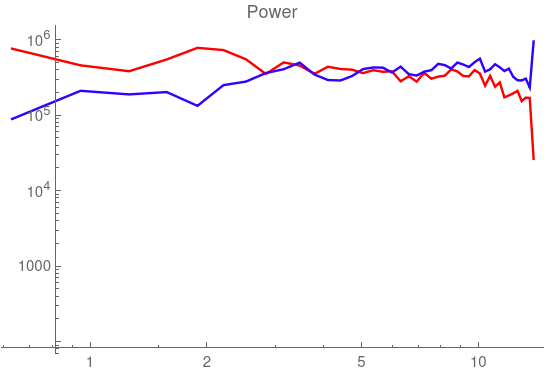
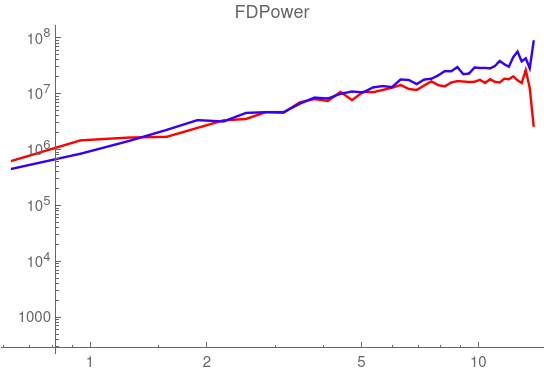
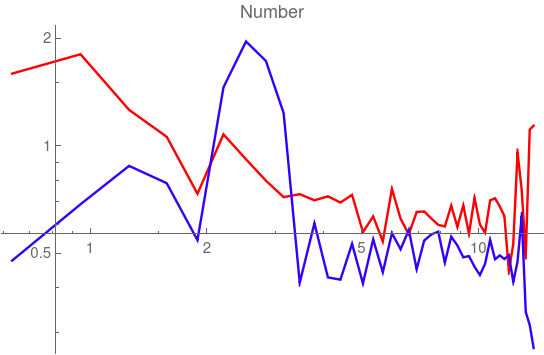
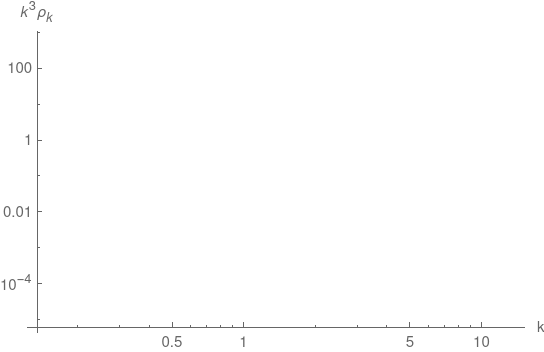

In [53]:
If[plotsomething == 1,
  For[time = 1, time <= numtimesmax, time++,
    Print[time];
    For[run = 0, run < numruns, run++,
     plotarray = {}; numplots = 0;
     If[plotpower == 1,
       powerplot[run][time] = 
       Show[Table[
         ListLogLogPlot[powertable[run][fld][time], Joined -> True, 
          PlotStyle -> {Hue[.7 fld/(nflds[run] - 1)]}], {fld, 0, 
          nflds[run] - 1}], 
        AxesOrigin -> {Log[10, kmin[run]], 
          Log[10, powerminallflds[run][time]]}, PlotRange -> All, 
        PlotLabel -> "Power"]; 
      AppendTo[plotarray, powerplot[run][time]];
      numplots++;
      ];
     If[plotfdpower == 1,
      fdpowerplot[run][time] = 
       Show[Table[
         ListLogLogPlot[fdpowertable[run][fld][time], Joined -> True, 
          PlotStyle -> {Hue[.7 fld/(nflds[run] - 1)]}], {fld, 0, 
          nflds[run] - 1}], 
        AxesOrigin -> {Log[10, kmin[run]], 
          Log[10, fdpowerminallflds[run][time]]}, PlotRange -> All, 
        PlotLabel -> "FDPower"];
      AppendTo[plotarray, fdpowerplot[run][time]];
      numplots++;
      ];
     If[plotnumber == 1,
      numberplot[run][time] = 
       Show[Table[
         ListLogLogPlot[numbertable[run][fld][time], Joined -> True, 
          PlotStyle -> {Hue[.7 fld/(nflds[run] - 1)]}], {fld, 0, 
          nflds[run] - 1}], 
        AxesOrigin -> {Log[10, kmin[run]], 
          Log[10, numberminallflds[run][time]]}, PlotRange -> All, 
        PlotLabel -> "Number"];
      AppendTo[plotarray, numberplot[run][time]];
      numplots++;
      ];
     If[plotenergy == 1,
      energyplot[run][time] = 
       Show[Table[
         ListLogLogPlot[energytable[run][fld][time], Joined -> True, 
          PlotStyle -> {Hue[.7 fld/(nflds[run] - 1)]}], {fld, 0, 
          nflds[run] - 1}], AxesOrigin -> {-2, -12}, 
        PlotRange -> {All, {-12, 6}}, 
        AxesLabel -> {"k", 
          "\!\(\*SuperscriptBox[\(k\), \(3\)]\)\!\(\*SubscriptBox[\(\
\[Rho]\), \(k\)]\)"}];
      AppendTo[plotarray, energyplot[run][time]];
      numplots++;
      ];
     If[numplots > 2, plotwidth = 700, plotwidth = 288*numplots];
     Print@
      Show[GraphicsGrid[{plotarray}, 
        ImageSize -> {plotwidth, plotwidth/GoldenRatio}, 
        PlotLabel -> 
         "Run " <> ToString[run] <> ": Spectra for all fields at t=" <>
           ToString[timetable[run][[time]]]]];
     ];
    ];
  ];
  
powerplot[0][21]
fdpowerplot[0][21]
numberplot[0][2]
energyplot[0][21]

In [37]:
numbertable[0][0][1]

{{0.628319, 0.328306}, {0.942478, 0.388363}, {1.25664, 0.403567}, {1.5708, 0.57886}, 
 
>   {1.88496, 0.557287}, {2.19912, 0.503725}, {2.51327, 0.654534}, {2.82743, 0.478717}, 
 
>   {3.14159, 0.4562}, {3.45575, 0.501827}, {3.76991, 0.54654}, {4.08407, 0.574116}, 
 
>   {4.39823, 0.405966}, {4.71239, 0.487812}, {5.02655, 0.423997}, {5.34071, 0.504361}, 
 
>   {5.65487, 0.413233}, {5.96903, 0.56491}, {6.28319, 0.502801}, {6.59735, 0.447802}, 
 
>   {6.9115, 0.507164}, {7.22566, 0.492398}, {7.53982, 0.480666}, {7.85398, 0.492345}, 
 
>   {8.16814, 0.504649}, {8.4823, 0.479459}, {8.79646, 0.490906}, {9.11062, 0.528979}, 
 
>   {9.42478, 0.447314}, {9.73894, 0.550327}, {10.0531, 0.432721}, {10.3673, 0.451085}, 
 
>   {10.6814, 0.511003}, {10.9956, 0.46165}, {11.3097, 0.495315}, {11.6239, 0.5565}, 
 
>   {11.9381, 0.352013}, {12.2522, 0.382008}, {12.5664, 0.620147}, {12.8805, 0.586001}, 
 
>   {13.1947, 0.416847}, {13.5089, 0.70436}, {13.823, 0.630238}}

-Graphics-


-Graphics-
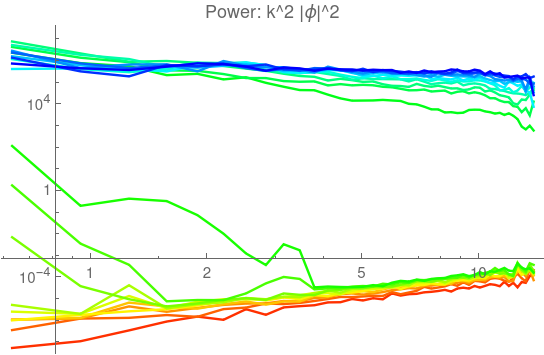

In [60]:
If[dopower == 1,
  For[run = 0, run < numruns, run++,
    For[fld = 0, fld < nflds[run], fld++,
     powerminalltimes[run][fld] = 
      Min[Table[powermin[run][fld][time], {time, 1, numtimes[run]}]];
     alltimespowerplot[run][fld] = 
      Show[Table[
        ListLogLogPlot[powertable[run][fld][time], Joined -> True, 
         PlotStyle -> {Hue[time/(1.5 numtimes[run])]}], {time, 1, 
         numtimes[run]}], PlotRange -> All, 
       PlotLabel -> 
        "Power: k^" <> ToString[kexponent] <> " |" <> label[fld] <> 
         "|^2", AxesOrigin -> {Log[10, kmin[run]], 
         Log[10, powerminalltimes[run][fld]]}];
     ];
    Print[
     Show[GraphicsGrid[{Table[
         alltimespowerplot[run][fld], {fld, 0, nflds[run] - 1}]}], 
      PlotLabel -> "Run " <> ToString[run], ImageSize -> 500]];
    ];
  ];
  
alltimespowerplot[0][0]



-Graphics-


-Graphics-
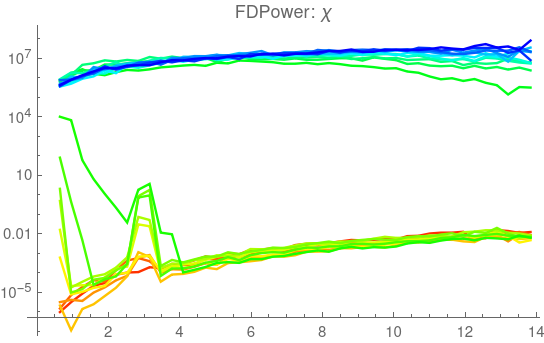

In [67]:
If[dofdpower == 1,
  For[run = 0, run < numruns, run++,
    For[fld = 0, fld < nflds[run], fld++,
     fdpowerminalltimes[run][fld] = 
      Min[Table[fdpowermin[run][fld][time], {time, 1, numtimes[run]}]];
     alltimesfdpowerplot[run][fld] = 
      Show[Table[
        ListLogPlot[fdpowertable[run][fld][time], Joined -> True, 
         PlotStyle -> {Hue[time/(1.5 numtimes[run])]}], {time, 1, 
         numtimes[run]}], PlotRange -> All, 
       PlotLabel -> "FDPower: " <> label[fld]];
     ];
    Print[
     Show[GraphicsGrid[{Table[
         alltimesfdpowerplot[run][fld], {fld, 0, nflds[run] - 1}]}], 
      PlotLabel -> "Run " <> ToString[run], ImageSize -> 500]];
    ];
  ];
  
alltimesfdpowerplot[0][1]

-Graphics-


-Graphics-
-Graphics-
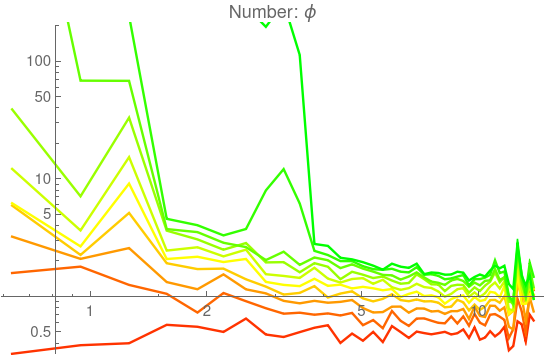
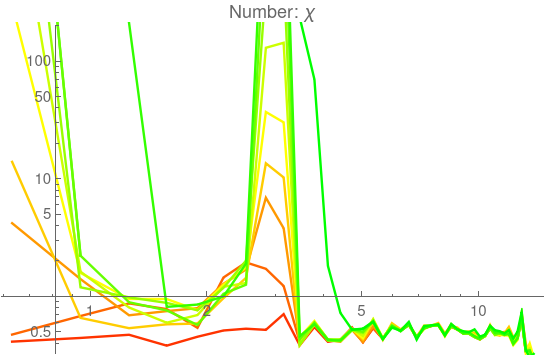

In [71]:
If[donumber == 1,
  For[run = 0, run < numruns, run++,
    For[fld = 0, fld < nflds[run], fld++,
     numberminalltimes[run][fld] = 
      Min[Table[
        numbermin[run][fld][time], {time, 1, numtimes[run]}]];
     numbermaxalltimes[run][fld] = 
      Max[Table[
        numbermax[run][fld][time], {time, 1, numtimes[run]}]];
     alltimesnumberplot[run][fld] = 
      Show[Table[
        ListLogLogPlot[numbertable[run][fld][time], Joined -> True, 
         PlotStyle -> {Hue[.7 time/numtimes[run]]}], {time, 1, 
         numtimes[run]}], PlotRange -> {-1, 5}, 
       PlotLabel -> "Number: " <> label[fld], 
       AxesOrigin -> {Log[10, kmin[run]], 0}, 
       AxesOrigin -> {Log[10, kmin[run]], 
         Log[10, numberminalltimes[run][fld]]}]
     ];
    Print[
     Show[GraphicsGrid[{Table[
         alltimesnumberplot[run][fld], {fld, 0, nflds[run] - 1}]}], 
      PlotLabel -> "Run " <> ToString[run], ImageSize -> 500]];
    ];
  ];
alltimesnumberplot[0][0]
alltimesnumberplot[0][1]

-Graphics-


-Graphics-
-Graphics-
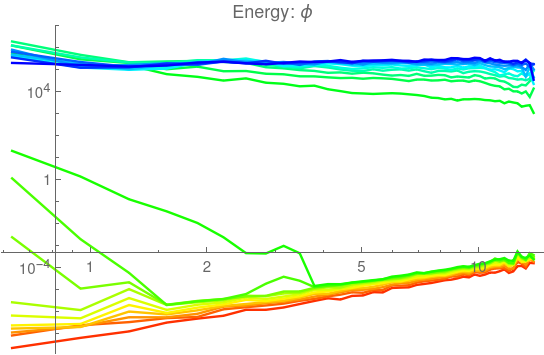
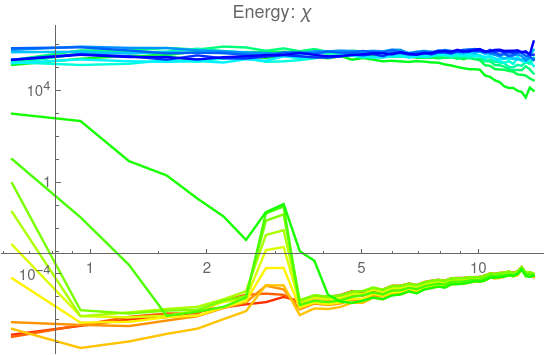

In [75]:
If[doenergy == 1,
  For[run = 0, run < numruns, run++,
    For[fld = 0, fld < nflds[run], fld++,
     energyminalltimes[run][fld] = 
      Min[Table[
        energymin[run][fld][time], {time, 1, numtimes[run]}]];
     alltimesenergyplot[run][fld] = 
      Show[Table[
        ListLogLogPlot[energytable[run][fld][time], Joined -> True, 
         PlotStyle -> {Hue[time/(1.5 numtimes[run])]}], {time, 1, 
         numtimes[run]}], PlotRange -> All, 
       PlotLabel -> "Energy: " <> label[fld], 
       AxesOrigin -> {Log[10, kmin[run]], 
         Log[10, energyminalltimes[run][fld]]}];
     ];
    Print[
     Show[GraphicsGrid[{Table[
         alltimesenergyplot[run][fld], {fld, 0, nflds[run] - 1}]}], 
      PlotLabel -> "Run " <> ToString[run], ImageSize -> 500]];
    ];
  ];
  
  alltimesenergyplot[0][0]
  alltimesenergyplot[0][1]